### 目标

对Daily Kos上发表的文章进行聚类分析。

### 数据

文章所包含单词及单词出现次数。

In [1]:
dailykos = read.csv("./data/dailykos.csv")
str(dailykos)

'data.frame':	3430 obs. of  1545 variables:
 $ abandon                                 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ abc                                     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ ability                                 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ abortion                                : int  0 0 0 0 0 0 0 0 0 0 ...
 $ absolute                                : int  0 0 0 0 0 0 0 0 0 0 ...
 $ abstain                                 : int  0 0 1 0 0 0 0 0 0 0 ...
 $ abu                                     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ abuse                                   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ accept                                  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ access                                  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ accomplish                              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ account                                 : int  0 0 2 0 0 0 0 0 0 0 ...
 $ accurate                                : int  0 0 0 0 0 0 0 0 0 

In [2]:
distances = dist(dailykos, method="euclidean")
clusterDailykos = hclust(distances, method="ward.D")

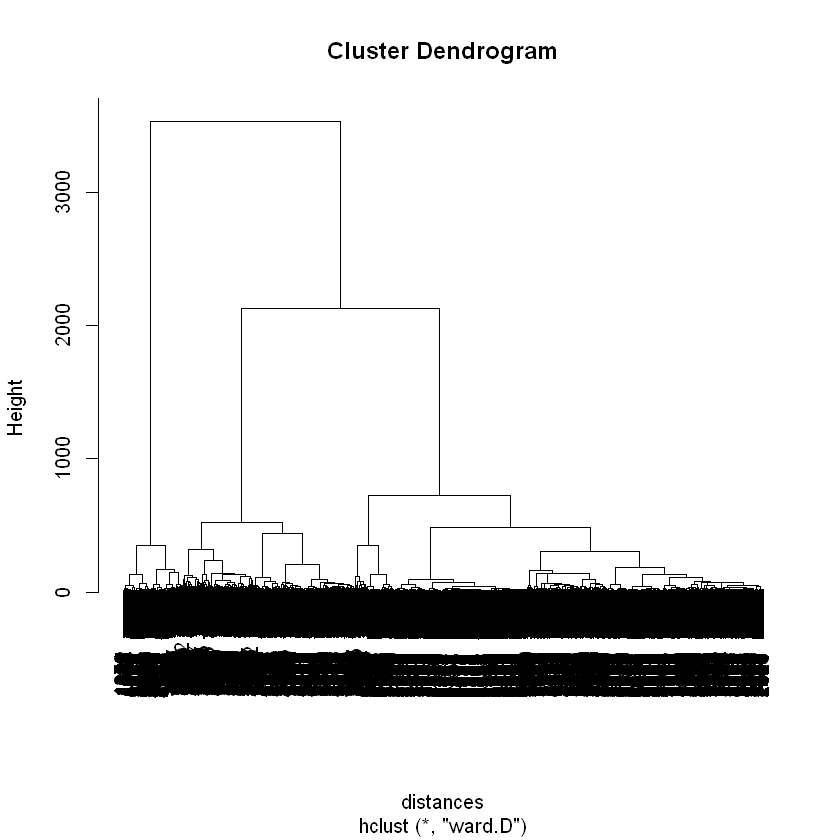

In [3]:
plot(clusterDailykos)

In [4]:
clusterGroups = cutree(clusterDailykos, k=7)

In [15]:
cluster1 = subset(dailykos, clusterGroups==1)
nrow(cluster1)

[1] 1266

In [14]:
cluster2 = subset(dailykos, clusterGroups==2)
nrow(cluster2)

[1] 321

In [13]:
cluster3 = subset(dailykos, clusterGroups==3)
nrow(cluster3)

[1] 374

In [12]:
cluster4 = subset(dailykos, clusterGroups==4)
nrow(cluster4)

[1] 139

In [11]:
cluster5 = subset(dailykos, clusterGroups==5)
nrow(cluster5)

[1] 407

In [16]:
cluster6 = subset(dailykos, clusterGroups==6)
nrow(cluster6)

[1] 714

In [18]:
cluster7 = subset(dailykos, clusterGroups==7)
nrow(cluster7)

[1] 209

In [19]:
tail(sort(colMeans(cluster1)))

state republican       poll   democrat      kerry       bush 
 0.7575039  0.7590837  0.9036335  0.9194313  1.0624013  1.7053712

In [20]:
tail(sort(colMeans(cluster2)))

bush  democrat challenge      vote      poll  november 
 2.847352  2.850467  4.096573  4.398754  4.847352 10.339564

In [21]:
tail(sort(colMeans(cluster3)))

elect    parties      state republican   democrat       bush 
  1.647059   1.665775   2.320856   2.524064   3.823529   4.406417

In [22]:
tail(sort(colMeans(cluster4)))

campaign    voter presided     poll     bush    kerry 
1.431655 1.539568 1.625899 3.589928 7.834532 8.438849

In [23]:
tail(sort(colMeans(cluster5)))

american       presided administration            war           iraq 
      1.090909       1.120393       1.230958       1.776413       2.427518 
          bush 
      3.941032

In [24]:
tail(sort(colMeans(cluster6)))

race      bush     kerry     elect  democrat      poll 
0.4579832 0.4887955 0.5168067 0.5350140 0.5644258 0.5812325

In [25]:
tail(sort(colMeans(cluster7)))

democrat    clark   edward     poll    kerry     dean 
2.148325 2.497608 2.607656 2.765550 3.952153 5.803828

In [2]:
set.seed(1000)
k = 7
KMC = kmeans(dailykos, centers=k)

In [3]:
str(KMC)

List of 9
 $ cluster     : int [1:3430] 4 4 6 4 1 4 7 4 4 4 ...
 $ centers     : num [1:7, 1:1545] 0.0342 0.0556 0.0253 0.0136 0.0491 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:7] "1" "2" "3" "4" ...
  .. ..$ : chr [1:1545] "abandon" "abc" "ability" "abortion" ...
 $ totss       : num 896461
 $ withinss    : num [1:7] 76583 52693 99504 258927 88632 ...
 $ tot.withinss: num 730632
 $ betweenss   : num 165829
 $ size        : int [1:7] 146 144 277 2063 163 329 308
 $ iter        : int 7
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


In [5]:
kmeansCluster1 = subset(dailykos, KMC$cluster==1)
kmeansCluster2 = subset(dailykos, KMC$cluster==2)
kmeansCluster3 = subset(dailykos, KMC$cluster==3)
kmeansCluster4 = subset(dailykos, KMC$cluster==4)
kmeansCluster5 = subset(dailykos, KMC$cluster==5)
kmeansCluster6 = subset(dailykos, KMC$cluster==6)
kmeansCluster7 = subset(dailykos, KMC$cluster==7)

In [7]:
tail(sort(colMeans(kmeansCluster1)))

state           iraq          kerry administration       presided 
      1.609589       1.616438       1.636986       2.664384       2.767123 
          bush 
     11.431507

In [8]:
tail(sort(colMeans(kmeansCluster2)))

primaries  democrat    edward     clark     kerry      dean 
 2.319444  2.694444  2.798611  3.090278  4.979167  8.277778

In [9]:
tail(sort(colMeans(kmeansCluster3)))

administration          iraqi       american           bush            war 
      1.389892       1.610108       1.685921       2.610108       3.025271 
          iraq 
      4.093863

In [10]:
tail(sort(colMeans(kmeansCluster4)))

elect republican      kerry       poll   democrat       bush 
 0.6010664  0.6175473  0.6495395  0.7474552  0.7891420  1.1473582

In [11]:
tail(sort(colMeans(kmeansCluster5)))

race     senate      state    parties republican   democrat 
  2.484663   2.650307   3.521472   3.619632   4.638037   6.993865

In [12]:
tail(sort(colMeans(kmeansCluster6)))

democrat      bush challenge      vote      poll  november 
 2.899696  2.960486  4.121581  4.446809  4.872340 10.370821

In [13]:
tail(sort(colMeans(kmeansCluster7)))

presided    voter campaign     poll     bush    kerry 
1.324675 1.334416 1.383117 2.788961 5.970779 6.480519